In [199]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
from helpers import *

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
tx = np.c_[np.ones((y.shape[0], 1)), x]

In [201]:
tx.shape, y.shape

((200, 3), (200, 1))

Sigmoid function

In [202]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    def sig_elem(z):
        if z <= 0:
            return np.exp(z) / (np.exp(z) + 1)
        else:
            return 1 / (1 + np.exp(-z))
    return np.vectorize(sig_elem)(x)

Logistic loss

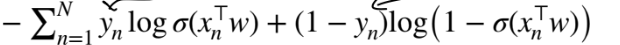
to multiply by 1/N

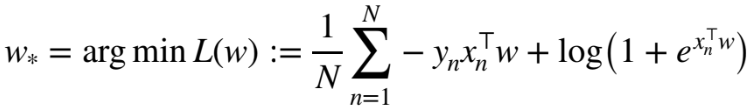

In [203]:
def compute_loss_logistic(y, tx, w):
    """Compute the cost by negative log likelihood.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        w: weights used to calculate loss
    
    Returns:
        logistic loss
    """
    
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]
    
    
    loss = np.sum(np.logaddexp(0, tx.dot(w))) - y.T.dot(tx.dot(w))
    return np.squeeze(loss).item() * (1 / y.shape[0])

    # Equivalent to:    
    # pred = sigmoid(tx.dot(w))
    # loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))
    
    # return np.squeeze(-loss).item() * (1 / y.shape[0])


Logistic gradient

In [204]:
def compute_gradient_logistic(y, tx, w):
    """Compute the gradient of loss for logistic regression.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        w: weights
        
    Returns:
        :return: logistic gradient
    """
    
    pred = sigmoid(tx.dot(w))
    return tx.T.dot(pred-y) * (1 / y.shape[0])

Batch iterator

In [205]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]

In [206]:
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """Logistic regression with loss minimized using gradient descent

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        lambda_: penalty factor
        initial_w: initial weight vector
        max_iters: number of iterations
        gamma: step size

    Returns:
        w: minimized weight vector
        loss: corresponding loss
    """
    w = initial_w
    losses = []
    for _ in range(max_iters):
        gradient = compute_gradient_logistic(y, tx, w)
        loss = compute_loss_logistic(y, tx, w)
        losses.append(loss)
        w = w - gamma * gradient
    return w, losses

def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """Regularized logistic regression using SGD.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        lambda_: penalty factor
        initial_w: initial weight vector
        max_iters: number of iterations
        gamma: step size

    Returns:
        w: minimized weight vector
        loss: corresponding loss
    """
    w = initial_w
    losses = []
    for _ in range(max_iters):
        # gamma = 1/(n_iter+1) not sure? Gamma is passed as constant in the project description
        for y_b, tx_b in batch_iter(y, tx, batch_size=len(y), num_batches=1):
            gradient = compute_gradient_logistic(y_b, tx_b, w) + 2 * lambda_ * w
            loss = compute_loss_logistic(y_b, tx_b, w) + lambda_ * np.squeeze(w.T.dot(w))
            losses.append(loss)
            w = w - gamma * gradient
    return w, losses

Params

In [207]:
max_iter = 10000
threshold = 1e-8
gamma = 0.5
w = np.zeros((tx.shape[1], 1))

In [208]:
w, losses = logistic_regression(y, tx, w, max_iters, gamma)
losses

[0.6931471805599452,
 0.5711340417430999,
 0.4985338275180892,
 0.45242495402522287,
 0.42109201806628976,
 0.39858293905925934,
 0.3816909779498382,
 0.3685703313028328,
 0.3580938654457308,
 0.34953802897443914,
 0.34241852024528413,
 0.33639960703815364,
 0.33124154416245605,
 0.32676874189394384,
 0.3228497636583545,
 0.3193843421252177,
 0.3162947081451577,
 0.31351965321314185,
 0.3110103725906339,
 0.3087274970132836,
 0.30663893528251224,
 0.30471828102864806,
 0.3029436190192392,
 0.3012966190156075,
 0.299761839632417,
 0.2983261876388838,
 0.2969784937419266,
 0.29570917665227453,
 0.2945099747662357,
 0.2933737301394871,
 0.29229421326855387,
 0.29126597998655,
 0.2902842538307975,
 0.28934482876262907,
 0.28844398826101597,
 0.28757843767472224,
 0.2867452473759377,
 0.2859418047642572,
 0.2851657735616999,
 0.28441505914501536,
 0.28368777890141955,
 0.2829822367834282,
 0.2822969013890837,
 0.28163038701428433,
 0.2809814372206786,
 0.28034891054074906,
 0.27973176800516